# Lab 5

Welcome to Lab 5! In this lab we will learn about sampling strategies and do an example on Hypothesis Testing. More information about Sampling in the textbook can be found [here!](https://ucsd-dsc10.gitbooks.io/textbook/content/chapters/08/5/sampling.html). This lab is due on **Friday, 11/08 at 11:59pm.**


The data used in this lab will contain salary data and statistics for basketball players from the 2014-2015 NBA season. This data was collected from [basketball-reference](http://www.basketball-reference.com) and [spotrac](http://www.spotrac.com).

In [13]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# These lines load the tests.
from client.api.notebook import Notebook
ok = Notebook('lab05.ok')
_ = ok.auth(inline=True)

Assignment: Statistics_and_sampling
OK, version v1.13.11



FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Labtop\\.config\\ok\\auth_refresh'

## 1. Dungeons and Dragons and Sampling
In the game Dungeons & Dragons, each player plays the role of a fantasy character.

A player performs actions by rolling a 20-sided die, adding a "modifier" number to the roll, and comparing the total to a threshold for success.  The modifier depends on her character's competence in performing the action.

For example, suppose Alice's character, a barbarian warrior named Roga, is trying to knock down a heavy door.  She rolls a 20-sided die, adds a modifier of 11 to the result (because her character is good at knocking down doors), and succeeds if the total is greater than 15.

**Question 1.1** 

Write code that simulates that procedure.  Compute three values: the result of Alice's roll (`roll_result`), the result of her roll plus Roga's modifier (`modified_result`), and a boolean value indicating whether the action succeeded (`action_succeeded`).  **Do not fill in any of the results manually**; the entire simulation should happen in code.

*Hint:* A roll of a 20-sided die is a number chosen uniformly from the array `make_array(1, 2, 3, 4, ..., 20)`.  So a roll of a 20-sided die *plus 11* is a number chosen uniformly from that array, plus 11.

In [2]:
possible_rolls = ...
roll_result = ...
modified_result = ...
action_succeeded = ...

# The next line just prints out your results in a nice way
# once you're done.  You can delete it if you want.
print("On a modified roll of {:d}, Alice's action {}.".format(modified_result, "succeeded" if action_succeeded else "failed"))

TypeError: unsupported format string passed to ellipsis.__format__

In [3]:
_ = ok.grade('q1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
 > Suite 1 > Case 1

>>> 12 <= modified_result <= 32
TypeError: '<=' not supported between instances of 'int' and 'ellipsis'

# Error: expected
#     True
# but got
#     Traceback (most recent call last):
#       ...
#     TypeError: '<=' not supported between instances of 'int' and 'ellipsis'

Run only this test case with "python3 ok -q q1_1 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



**Question 1.2** Run your cell 7 times to manually estimate the chance that Alice succeeds at this action.  (Don't use math or an extended simulation). Your answer should be a fraction. 

In [4]:
rough_success_chance = ...

In [5]:
_ = ok.grade('q1_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
 > Suite 1 > Case 1

>>> 0 <= rough_success_chance <= 1
TypeError: '<=' not supported between instances of 'int' and 'ellipsis'

# Error: expected
#     True
# but got
#     Traceback (most recent call last):
#       ...
#     TypeError: '<=' not supported between instances of 'int' and 'ellipsis'

Run only this test case with "python3 ok -q q1_2 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



Suppose we don't know that Roga has a modifier of 11 for this action.  Instead, we observe the modified roll (that is, the die roll plus the modifier of 11) from each of 7 of her attempts to knock down doors.  We would like to estimate her modifier from these 7 numbers.

**Question 1.3** Write a Python function called `simulate_observations`.  It should take no arguments, and it should return an array of 7 numbers.  Each of the numbers should be the modified roll from one simulation.  **Then**, call your function once to compute an array of 7 simulated modified rolls.  Name that array `observations`.

In [6]:
modifier = 11
num_observations = 7

def simulate_observations():
    """Produces an array of 7 simulated modified die rolls"""
    ...
    
observations = ...
observations

Ellipsis

In [7]:
_ = ok.grade('q1_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
 > Suite 1 > Case 1

>>> abs(5.7 - np.std([simulate_observations() for _ in range(5000)])) < .2
Traceback (most recent call last):
  File "C:\Users\Labtop\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py", line 3038, in std
    **kwargs)
  File "C:\Users\Labtop\Anaconda3\lib\site-packages\numpy\core\_methods.py", line 140, in _std
    keepdims=keepdims)
  File "C:\Users\Labtop\Anaconda3\lib\site-packages\numpy\core\_methods.py", line 107, in _var
    arrmean = umr_sum(arr, axis, dtype, keepdims=True)
TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

# Error: expected
#     True
# but got
#     Traceback (most recent call last):
#       ...
#     TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

Run only this test case with "python3 ok -q q1_3 --suite 1 --case 1"
---------------------

**Question 1.4** Draw a histogram to display the *probability distribution* of the modified rolls we might see. 

TypeError: '<' not supported between instances of 'ellipsis' and 'int'

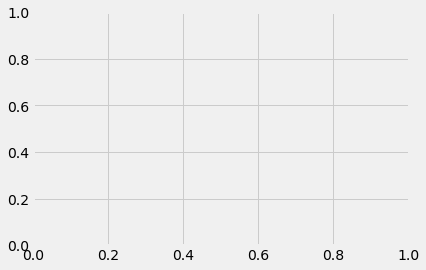

In [8]:
# We suggest using these bins.
roll_bins = np.arange(1, modifier+2+20, 1)

plots.hist(observations, bins=roll_bins)

Now let's imagine we don't know the modifier and try to estimate it from `observations`.

One straightforward way to do that is to find the *smallest* total roll.  The smallest roll on a 20-sided die is 1, so if we get a roll of 1 then the modifier must be 0.

**Question 1.5** Using that method, estimate `modifier` from `observations` and name that estimate `min_estimate`.

In [9]:
min_estimate = ...
min_estimate

Ellipsis

In [10]:
_ = ok.grade('q1_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
 > Suite 1 > Case 1

>>> min_estimate == min(observations) - 1
TypeError: 'ellipsis' object is not iterable

# Error: expected
#     True
# but got
#     Traceback (most recent call last):
#       ...
#     TypeError: 'ellipsis' object is not iterable

Run only this test case with "python3 ok -q q1_5 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



Another way to estimate the modifier involves the mean of `observations`.

**Question 1.6** Figure out a good estimate based on that quantity.  **Then**, write a function named `mean_based_estimator` that computes your estimate.  It should take an array of modified rolls (like the array `observations`) as its argument and return an estimate of `modifier` based on those numbers.

In [11]:
def mean_based_estimator(nums):
    """Estimate the roll modifier based on observed modified rolls in the array nums."""
    ...

# Here is an example call to your function.  It computes an estimate
# of the modifier from our 7 observations.
mean_based_estimate = mean_based_estimator(observations)
mean_based_estimate

In [12]:
_ = ok.grade('q1_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
 > Suite 1 > Case 1

>>> # Make sure your estimator is subtracting a reasonable value from the mean observation
>>> ok_test_array = make_array(1, 2, 3, 4, 5, 6, 7)
>>> abs(11 - (np.mean(ok_test_array) - mean_based_estimator(ok_test_array))) < 4
TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

# Error: expected
#     True
# but got
#     Traceback (most recent call last):
#       ...
#     TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

Run only this test case with "python3 ok -q q1_6 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



## 2. Sampling

Run the cell below to load the player and salary data.

In [ ]:
player_data = Table().read_table("player_data.csv")
salary_data = Table().read_table("salary_data.csv")
full_data = salary_data.join("PlayerName", player_data, "Name")
# The show method immediately displays the contents of a table. 
# This way, we can display the top of two tables using a single cell.
player_data.show(3)
salary_data.show(3)
full_data.show(3)

Rather than getting data on every player, imagine that we had gotten data on only a smaller subset of the players.  For 492 players, it's not so unreasonable to expect to see all the data, but usually we aren't so lucky.  Instead, we often make *statistical inferences* about a large underlying population using a smaller sample.

A **statistical inference** is a statement about some statistic of the underlying population, such as "the average salary of NBA players in 2014 was $3".  You may have heard the word "inference" used in other contexts.  It's important to keep in mind that statistical inferences can be wrong.

A general strategy for inference using samples is to estimate statistics of the population by computing the same statistics on a sample.  This strategy sometimes works well and sometimes doesn't.  The degree to which it gives us useful answers depends on several factors, and we'll touch lightly on a few of those today.

One very important factor in the utility of samples is how they were gathered.  We have prepared some example sample datasets to simulate inference from different kinds of samples for the NBA player dataset.  Later we'll ask you to create your own samples to see how they behave.

To save typing and increase the clarity of your code, we will package the loading and analysis code into two functions. This will be useful in the rest of the lab as we will repeatedly need to create histograms and collect summary statistics from that data.

**Question 2.1**. Complete the `histograms` function, which takes a table with columns `Age` and `Salary` and draws a histogram for each one. Use the min and max functions to pick the bin boundaries so that all data appears for any table passed to your function. Use the same bin widths as before (1 year for `Age` and $1,000,000 for `Salary`). 

*Hint:* Make sure that your bins **include** the maximum value.  Remember that bins include the left value but exclude the right value.

In [ ]:
def histograms(t):
    ages = t.column('Age')
    salaries = t.column('Salary')
    age_bins = ...
    salary_bins = ...
    t.hist('Age', bins=age_bins, unit='year')
    t.hist('Salary', bins=salary_bins, unit='$')
    return age_bins, salary_bins # Keep this statement so that your work can be checked
    
histograms(full_data)
print('Two histograms should be displayed below')

In [ ]:
_ = ok.grade('q2_1') # Warning: Charts will be displayed while running this test

**Question 2.2**. Create a function called `compute_statistics` that takes a Table containing ages and salaries and:
- Draws a histogram of ages
- Draws a histogram of salaries
- Return a two-element array containing the average age and average salary

You can call your `histograms` function to draw the histograms!

In [ ]:
def compute_statistics(age_and_salary_data):
    ...
    age = ...
    salary = ...
    ...
    

full_stats = compute_statistics(full_data)
full_stats

In [ ]:
_ = ok.grade('q2_2') # Warning: Charts will be displayed while running this test

### Convenience sampling
One sampling methodology, which is **generally a bad idea**, is to choose players who are somehow convenient to sample.  For example, you might choose players from one team that's near your house, since it's easier to survey them.  This is called, somewhat pejoratively, *convenience sampling*.

Suppose you survey only *relatively new* players with ages less than 22.  (The more experienced players didn't bother to answer your surveys about their salaries.)

**Question 2.3**  Assign `convenience_sample` to a subset of `full_data` that contains only the rows for players under the age of 22.

In [ ]:
convenience_sample = ...
convenience_sample

In [ ]:
_ = ok.grade('q2_3')

**Question 2.4** Assign `convenience_stats` to an array of the average age and average salary of your convenience sample, using the `compute_statistics` function.  Since they're computed on a sample, these are called *sample averages*. 

In [ ]:
convenience_stats = ...
convenience_stats

In [ ]:
_ = ok.grade('q2_4')

Next, we'll compare the convenience sample salaries with the full data salaries in a single histogram. To do that, we'll need to use the `bin_column` option of the `hist` method, which indicates that all columns are counts of the bins in a particular column. The following cell should not require any changes; just run it.

In [ ]:
def compare_salaries(first, second, first_title, second_title):
    """Compare the salaries in two tables."""
    max_salary = max(np.append(first.column('Salary'), second.column('Salary')))
    bins = np.arange(0, max_salary+1e6+1, 1e6)
    first_binned = first.bin('Salary', bins=bins).relabeled(1, first_title)
    second_binned = second.bin('Salary', bins=bins).relabeled(1, second_title)
    first_binned.join('bin', second_binned).hist(bin_column='bin')

compare_salaries(full_data, convenience_sample, 'All Players', 'Convenience Sample')

**Question 2.5** Does the convenience sample give us an accurate picture of the age and salary of the full population of NBA players in 2014-2015?  Would you expect it to, in general?  Assign either 1, 2, 3, or 4 to the variable `sampling_q5` below. 
1. Yes. The sample is large enough, so it is an accurate representation of the population.
2. No. The sample is too small, so it won't give us an accurate representation of the population.
3. No. But this was just an unlucky sample, normally this would give us an accurate representation of the population.
4. No. This type of sample doesn't give us an accurate representation of the population.

In [ ]:
sampling_q5 = ...

In [ ]:
_ = ok.grade('q2_5')

### Simple random sampling
A more principled approach is to sample uniformly at random from the players.  If we ensure that each player is selected at most once, this is a *simple random sample without replacement*, sometimes abbreviated to "simple random sample" or "SRSWOR".  Imagine writing down each player's name on a card, putting the cards in a hat, and shuffling the hat.  Then, pull out cards one by one and set them aside, stopping when the specified *sample size* is reached.

We've produced two samples of the `salary_data` table in this way: `small_srswor_salary.csv` and `large_srswor_salary.csv` contain, respectively, a sample of size 44 (the same as the convenience sample) and a larger sample of size 100.  

The `load_data` function below loads a salary table and joins it with `player_data`.

In [ ]:
def load_data(salary_file):
    return player_data.join('Name', Table.read_table(salary_file), 'PlayerName')

**Question 2.6** Run the same analyses on the small and large samples that you previously ran on the full dataset and on the convenience sample.  Compare the accuracy of the estimates of the population statistics that we get from the small simple random sample, the large simple random sample, and the convenience sample. 

**Note:** `small_srswor_data` and `large_srswor_data` should be Tables loaded from their respective `small_srswor_salary.csv` and `large_srswor_salary.csv`

In [ ]:
# Original:
small_srswor_data = ...
small_stats = ...
large_srswor_data = ...
large_stats = ...
convenience_stats = ...
print('Full data stats:                 ', full_stats)
print('Small simple random sample stats:', small_stats)
print('Large simple random sample stats:', large_stats)
print('Convenience sample stats:        ', convenience_stats)

In [ ]:
_ = ok.grade('q2_6')

### Producing simple random samples
Often it's useful to take random samples even when we have a larger dataset available.  The randomized response technique was one example we saw in [Chapter 10](https://www.inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html) and in lecture with united flight delays.  Another is to help us understand how inaccurate other samples are.

Tables provide the method `sample()` for producing random samples.  Note that its default is to sample with replacement. To see how to call `sample()`, search the [documentation](http://data8.org/datascience) at `data8.org/datascience`, or enter `full_data.sample?` into a code cell and press Enter.

**Question 2.7** Produce a simple random sample of size 44 from `full_data`.  (You don't need to bother with a join this time –– just use `full_data.sample(...)` directly.  That will have the same result as sampling from `salary_data` and joining with `player_data`.)  Run your analysis on it again.

In [ ]:
my_small_srswor_data = ...
my_small_stats = ...
my_small_stats

Are your results similar to those in the small sample we provided you? Do things change alot across separate samples? Run your code several times to get new samples. Assign either 1, 2, 3, or 4 to the variable `sampling_q7` below.
1. The results are very different from the small sample, and don't change at all across separate samples.
2. The results are very different from the small sample, and change a bit across separate samples.
3. The results are slightly different from the small sample, and change a bit across separate samples.
4. The results are not at all different from the small sample, and don't change at all across separate samples.

In [ ]:
sampling_q7 = ...

In [ ]:
_ = ok.grade('q2_7')

**Question 2.8** As in the previous question, analyze several simple random samples of size 100 from `full_data`.

In [ ]:
my_large_srswor_data = ...
my_large_stats = ...
my_large_stats

Do the average and histogram statistics seem to change more or less across samples of this size than across samples of size 44?  And are the sample averages and histograms closer to their true values for age or for salary?  Assign either 1, 2, 3, 4, or 5 to the variable `sampling_q8` below. 

Is this what you expected to see?
1. The statistics change *less* across samples of this size than across smaller samples. The statistics are closer to their true values for *age* than they are for *salary*.
2. The statistics change *less* across samples of this size than across smaller samples. The statistics are closer to their true values for *salary* than they are for *age*.
3. The statistics change *more* across samples of this size than across smaller samples. The statistics are closer to their true values for *age* than they are for *salary*.
4. The statistics change *more* across samples of this size than across smaller samples. The statistics are closer to their true values for *salary* than they are for *age*.
5. The statistics change an *equal amount* across samples of this size as across smaller samples. The statistics for age and salary are *equally close* to their true values.

In [ ]:
sampling_q8 = ...

In [ ]:
_ = ok.grade('q2_8')

## 3: Hypothesis Techniques and Examining the Therapeutic Touch

In this section, we'll use hypothesis testing techniques that were introduced in lecture to test the idea of the therapeutic touch, the idea that some practictioners can feel and massage your human energy field. 

### What is Therapeutic Touch?

Therapeutic Touch (TT) is an energy therapy that practitioners claim can promote health and relaxation. Practitioners place their hands near a patient and say they are able to detect and manipulate the patient's so-called Human Energy Field (HEF). 
TT was popular throughout the 20th century and was toted as a great way to bring balance to a person's health. 

### Emily Rosa

Emily Rosa was a 4th grade student who had wide exposure to the world of TT due to her parents, who were both medical practitioners and skeptics of the idea of TT. 

For her 4th grade science fair project, Emily decided to test whether or not TT practitioners could truly interact with a person's HEF. 

**Question 1:** Describe how you might set up an experiment to test this.

*Write your answer here, replacing this text.*

### Emily's Experiment

Emily's experiment was clean, simple, and effective. Due to her parents' occupations in the medical field, she had wide access to people who claimed to be TT practitioners. 

Emily took 21 TT practitioners and used them for her science experiment. She would take a TT practitioner and let them examine her hands to determine which had the stronger energy field. Then she had extend their hands through a screen so they could not see her. On the other side of the screen, Emily would flip a coin. Depending on how the coin landed, she would put out either her left hand or her right hand. The TT practitioner would then have to correctly answer which hand Emily put out. Overall, in 210 samples, the practitioner picked the correct hand 44% of the time. 

Emily's main goal here was to test whether or not the TT practicioners' guesses were random, like the flip of a coin. In most medical experiments, this is the norm. We want to test whether or not the treatment has an effect, *not* whether or not the treatment actually works. 

We will now begin to formulate this experiment in terms of the terminology we learned in this course. 

**Question 2**: What are the null and alternative hypotheses for Emily's experiment? 

**Your Answer Here:**

Null Hypothesis: 

Alternative Hypothesis: 

**Question 3:** Remember that the practitioner got the correct answer 44% of the time. According to the null hypothesis, on average, what proportion of times do we expect the practitioner to guess the correct hand? Make sure your answer is between 0 and 1. 

In [ ]:
expected_correct = ...
expected_correct

In [ ]:
_ = ok.grade('q3_3')

The goal now is to see if our deviation from this expected proportion of correct answers is due to something other than chance. 

**Question 4:** Which of the following is the best statistic for testing this model? Assign `best_ts` to 1, 2, or 3.

1. The difference of the expected percent correct and the actual percent correct
2. The absolute difference of the expected percent correct and the actual percent correct
3. The sum of the expected percent correct and the actual percent correct

In [ ]:
best_ts = 
best_ts

In [ ]:
_ = ok.grade('q3_4')

**Question 5:** Define the function `test_statistic` which takes in an expected proportion and an actual proportion, and returns the value of the test statistic chosen above. Assume that you are taking in proportions, but you want to return your answer as a percentage. 

*Hint:* Remember we are asking for a **percentage**, not a proportion. 

In [ ]:
def test_statistic(expected_prop, actual_prop):
    ...


In [ ]:
_ = ok.grade('q3_5')

**Question 6:** Use your newly defined function to calculate the observed test statistic from Emily's experiment. 

In [ ]:
observed_test_statistic = ...
observed_test_statistic

In [ ]:
_ = ok.grade('q3_6')

**Is this test statistic likely if the null hypothesis was true? Or is the deviation from the expected proportion due to something other than chance?**

In order to answer this question, we must simulate the experiment as though the null hypothesis was true, and calculate the test statistic per each simulation.

**Question 7:** To begin simulating, we should start by creating an array which has two items in it. The first item should be the proportion of times, assuming the null model is true, a TT practictioner picks the correct hand. The second item should be the proportion of times, under the same assumption, that the TT practicioner picks the incorrect hand. Assign `model_proportions` to this array. After this, simulate, using the `sample_proportions` function, Emily running through this experiment 210 times (as done in real life), and assign the proportion of correct answers to `simulation_proportion`. Lastly, define `one_test_statistic` to the test statistic of this one simulation. 

*Hint:* `sample_proportions` usage can be found here: [here](http://data8.org/sp18/python-reference.html)

In [ ]:
model_proportions = ...
simulation_proportion = ...
one_test_statistic = ...
one_test_statistic

In [ ]:
_ = ok.grade('q3_7')

**Question 8:** Let's now see what the distribution of test statistics is actually like under our fully specified model. Assign `simulated_test_statistics` to an array of 1000 test statistics that you simulated assuming the null hypothesis is true. 

*Hint:* This should follow the same pattern as normal simulations, in combination with the code you did in the previous problem.  

In [ ]:
num_repetitions = 1000
num_guesses = 210

simulated_test_statistics = ...

for ... in ...:
    ...


In [ ]:
_ = ok.grade('q3_8')

Let's view the distribution of the simulated test statistics under the null, and visually compare how the observed test statistic lies against the rest. 

In [ ]:
t = Table().with_column('Simulated Test Statistics', simulated_test_statistics)
t.hist()
plots.scatter(observed_test_statistic, 0, color='red', s=30)

We can make a visual argument as to whether or not we believe the observed test statistic is likely to occur under the null, or we can use the definition of p-values to help us make a more formal argument. 

**Question 9:** Assume `p_value` to the integer corresponding to the correct definition of what a p-value really is. 

1. The chance, under the null hypothesis, that the test statistic is equal to the value that was observed
2. The chance, under the null hypothesis, that the test statistic is equal to the value that was observed or is even further in the direction of the alternative
3. The chance, under the alternative hypothesis, that the test statistic is equal to the value that was observed or is even further in the direction of the null 
4. The number of times, under the null hypothesis, that the test statistic is equal to the value that was observed or is even further in the direction of the alternative

In [ ]:
p_value = ...
p_value

In [ ]:
_ = ok.grade('q3_9')

**Question 10:** Using the definition above, calculate the p-value of Emily's observed value in this experiment. 

*Hint:* If our test statistic is further in the direction of the alternative, will larger value or a smaller value? 

*Hint:* [This section](https://www.inferentialthinking.com/chapters/11/3/decisions-and-uncertainty) of the textbook contains an example of calculating an empirical p-value.

In [ ]:
emily_p_val = ...
emily_p_val

In [ ]:
_ = ok.grade('q3_10')

If our p-value is less than or equal to .05, then this is in favor of our alternative and we reject the null hypothesis. Otherwise, we do not have enough evidence against our null hypothesis. Note that this does **not** say we side in favor with the null hypothesis and accept it, but rather, that we just fail to reject it. 

This should help you make your own conclusions about Emily Rosa's experiment. 

Therapeutic touch fell out of use after this experiment, which was eventually accepted into one of the premier medical journals. TT practitioners hit back and accused Emily and her family of tampering with the results, while some claimed that Emily's bad spiritual mood towards therapeutic touch made it difficult to read her HEF. Whatever it may be, Emily's experiment is a classic example about how anyone, with the right resources, can test anything they want!

Lastly, make sure to run all the tests (the next cell has a shortcut for that), save your work, and run the submit cell! 

## Before submitting, select "Kernel" -> "Restart & Run All" from the menu!

Then make sure that all of your cells ran without error.

**Well Done!** You are done with lab 05. Please run the below cells to ensure that you have passed all of your tests and to submit to okPy. 

In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]

In [ ]:
_ = ok.submit()